# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
# Checking the number of mice
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")


Number of mice: 249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the Mouse IDs of the duplicate entries
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()

print("Duplicate mice by ID number:")
print(duplicate_mice_ids)


Duplicate mice by ID number:
['g989']


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ids)]

print("Data for duplicate mouse IDs:")
print(duplicate_data)

Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the combined DataFrame for duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print("Data for duplicate mouse IDs:")
print(duplicate_mouse_data)


Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
9

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping duplicate mouse entries
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the first few rows of the clean DataFrame for verification
print(clean_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [10]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice_clean}")


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group by 'Drug Regimen' and calculate summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Tumor Volume Std. Dev.', 'std'),
    ('Tumor Volume Std. Err.', 'sem')
])

# Display the summary statistics table
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate summary statistics table using aggregation method
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

# Display the summary statistics table
print(summary_stats_advanced)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

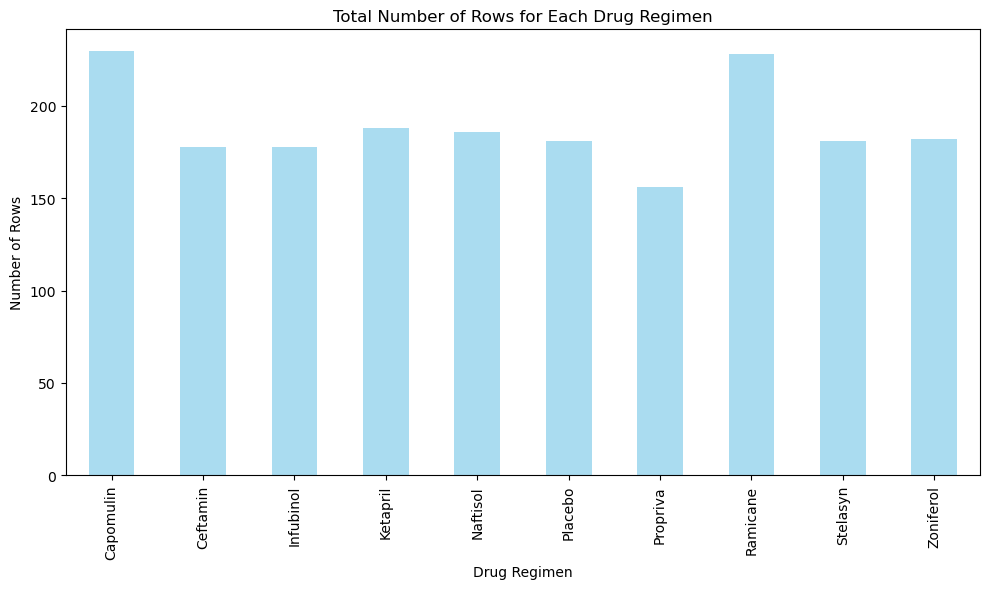

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows in each group
rows_per_regimen = clean_data.groupby('Drug Regimen').size()

# Create a bar plot
rows_per_regimen.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.7)

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.tight_layout()
plt.show()


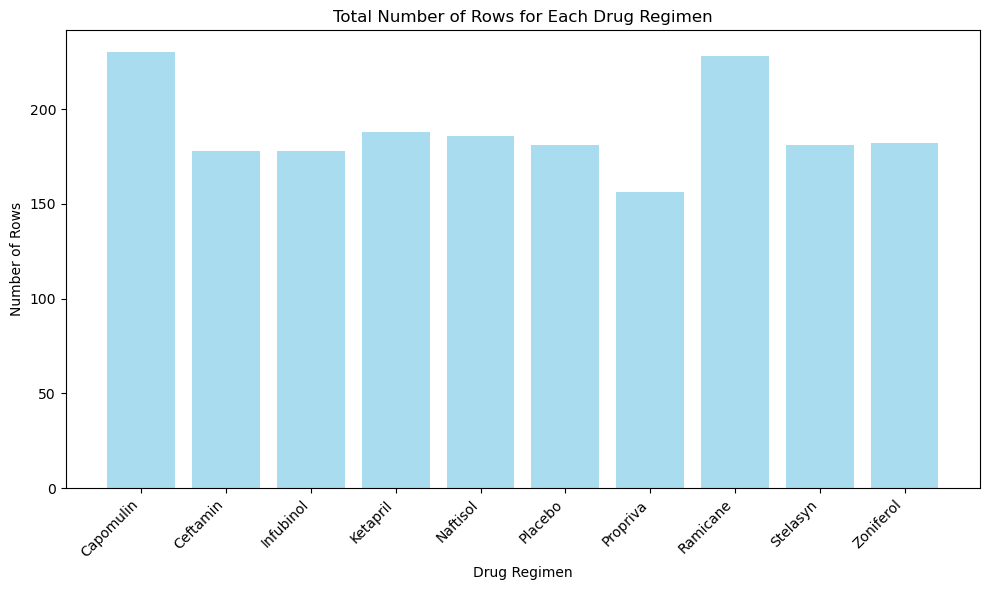

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Group the data by 'Drug Regimen' and count the number of rows in each group
rows_per_regimen = clean_data.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(rows_per_regimen.index, rows_per_regimen, color='skyblue', alpha=0.7)

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


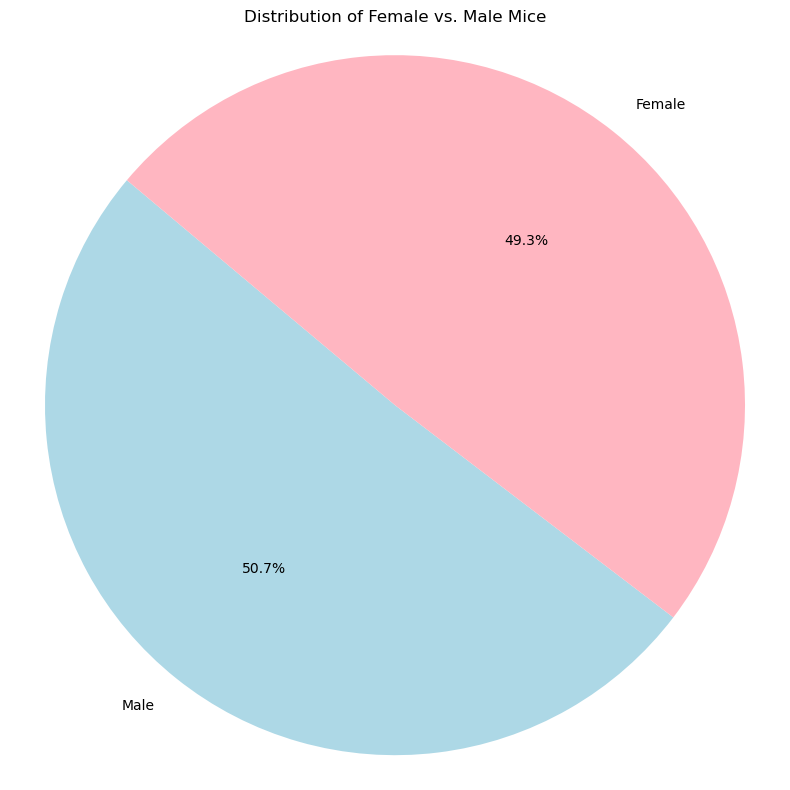

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of mice for each gender
gender_distribution = clean_data['Sex'].value_counts()

# Create a pie plot
gender_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])

# Set the title and labels
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')  # Remove y-label

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


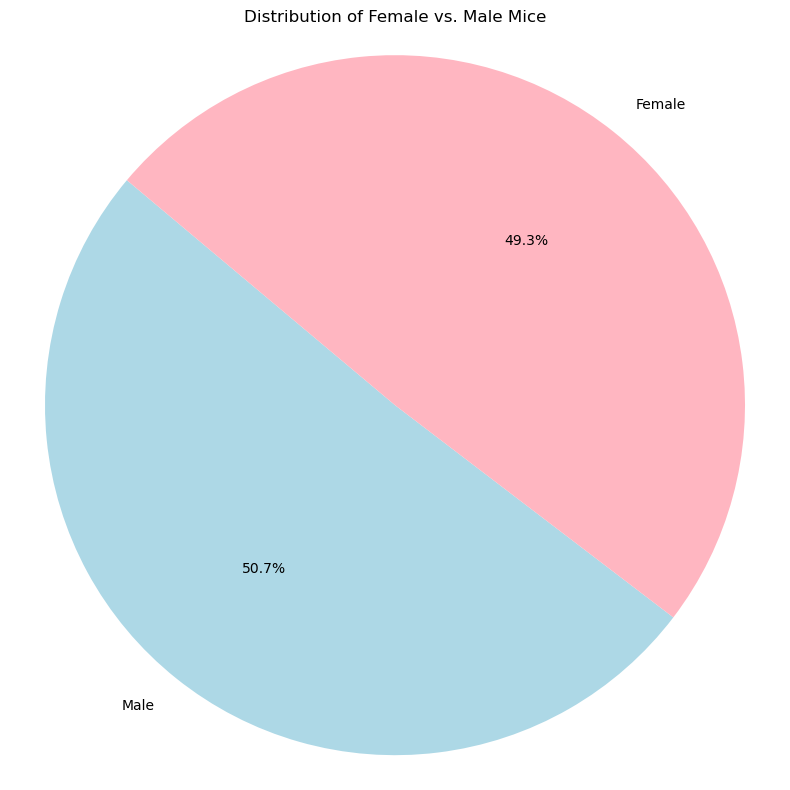

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Count the number of mice for each gender
gender_distribution = clean_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the DataFrame for the required treatment regimens
required_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(required_regimens)]

# Group the filtered data by 'Mouse ID' and get the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_per_mouse, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame showing the final tumor volume of each mouse across the specified treatment regimens
print(final_tumor_volume)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [18]:
# Put treatments into a list for for loop (and later for plot labels)

# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR for each treatment regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate the lower and upper bounds to determine outliers
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the treatment regimen and any potential outliers
    print(f"Potential outliers for {treatment}: {outliers}")

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


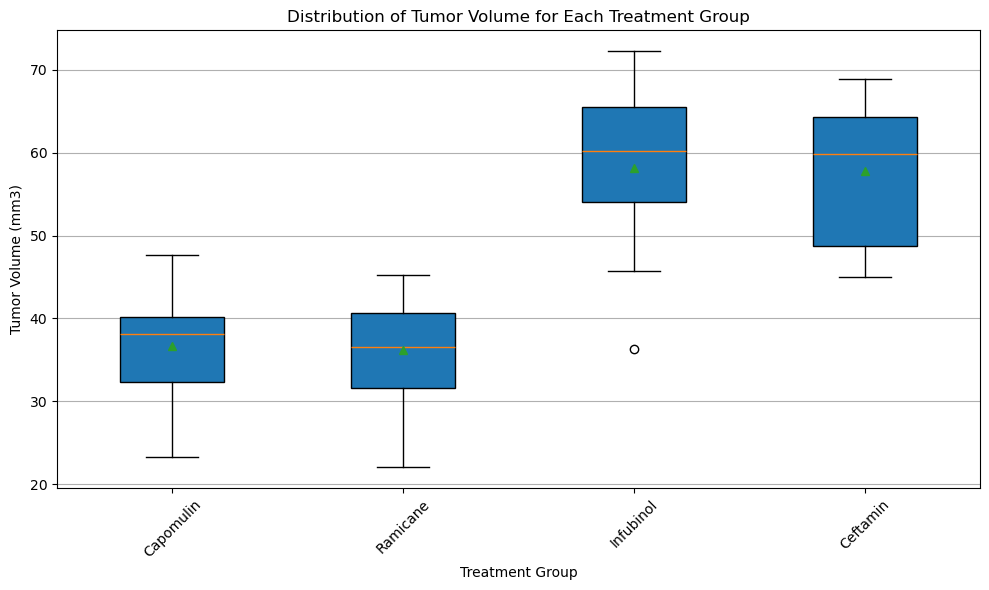

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, showmeans=True)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to y-axis for better visualization
plt.tight_layout()
plt.show()


## Line and Scatter Plots

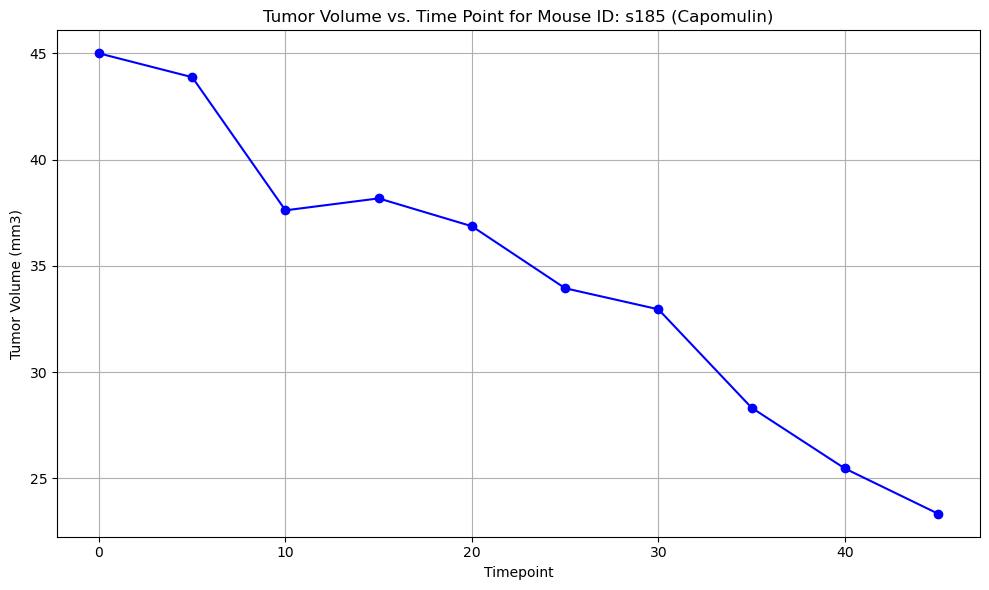

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Selecting the first mouse for demonstration

# Filter data for the selected mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


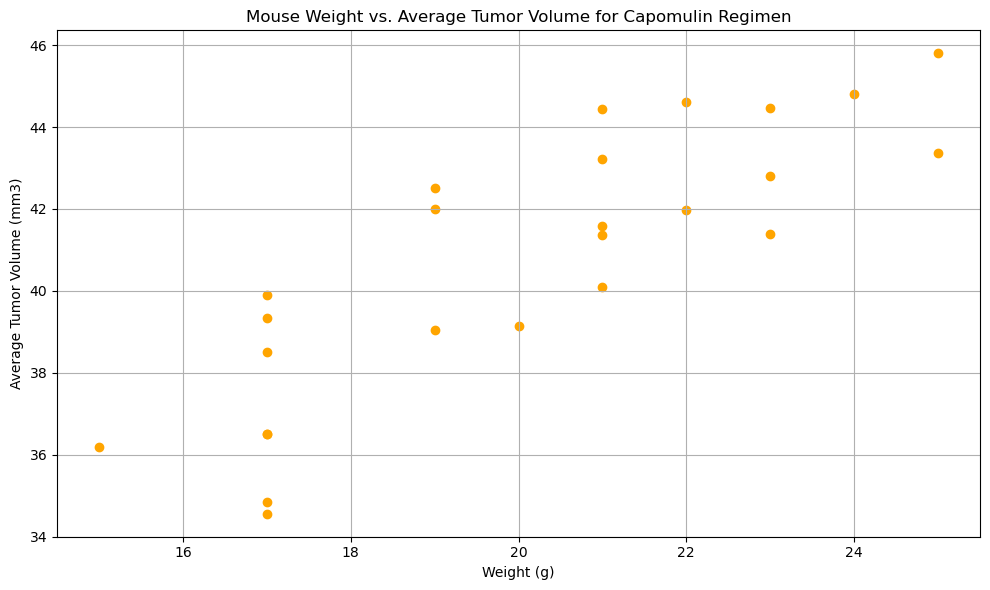

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the data by Mouse ID to calculate the average tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight information
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Create a scatter plot of mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='orange')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = st.pearsonr(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])[0]

# Perform linear regression to get the slope, intercept, r-value, p-value, and standard error of the slope
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Create a linear regression equation in the form of y = mx + b
linear_regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the correlation coefficient and linear regression equation
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Linear Regression Equation: {linear_regression_eq}")


Correlation Coefficient: 0.84
Linear Regression Equation: y = 0.95x + 21.55
